In [1]:
import numpy as np
import scipy.stats as st

import cellrank as cr
import scanpy as sc

cr.settings.verbosity = 2
sc.settings.set_figure_params(
    frameon=False,
    dpi=100,
)

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

In [3]:
adata = cr.datasets.pancreas(kind="preprocessed-kernel")

vk = cr.kernels.VelocityKernel.from_adata(adata, key="T_fwd")
vk

100%|██████████| 234M/234M [00:07<00:00, 34.1MB/s] 


VelocityKernel[n=2531, model='deterministic', similarity='correlation', softmax_scale=4.013]

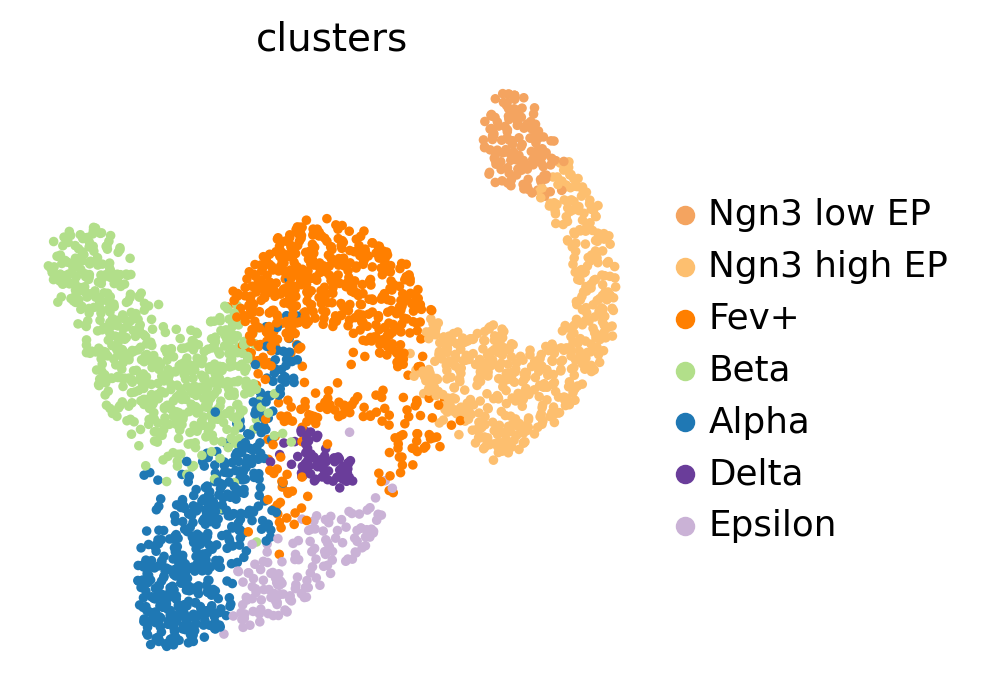

In [4]:
sc.pl.embedding(adata, basis="umap", color="clusters")

In [5]:
g = cr.estimators.GPCCA(vk)
print(g)

GPCCA[kernel=VelocityKernel[n=2531], initial_states=None, terminal_states=None]


Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[5, 10]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:03)
Calculating minChi criterion in interval `[4, 12]`
Computing `4` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


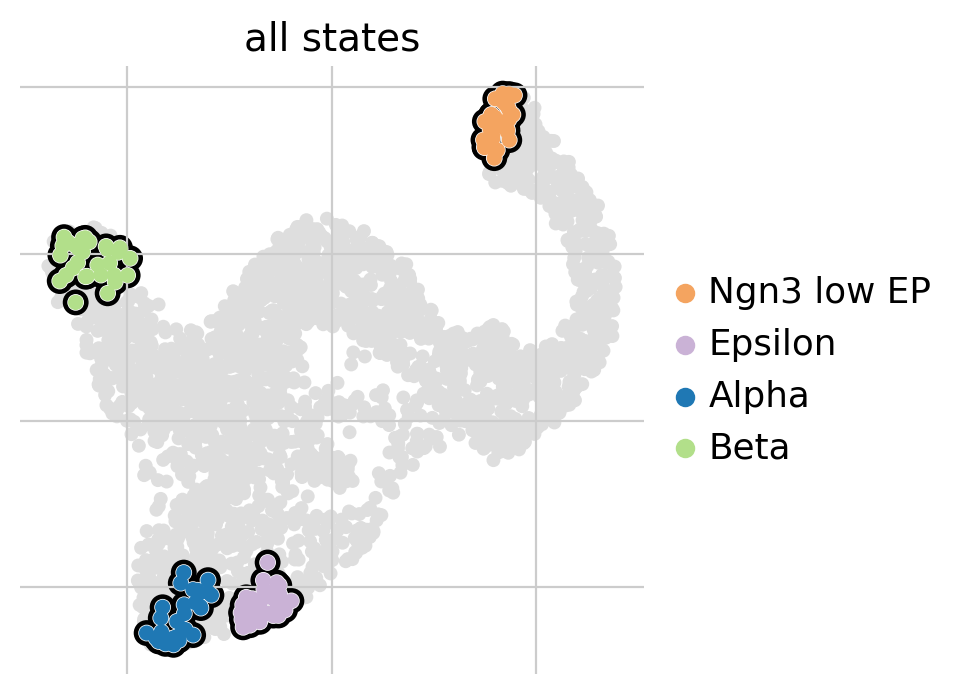

In [6]:
g.fit(cluster_key="clusters", n_states=[4, 12])
g.plot_macrostates(which="all", discrete=True, legend_loc="right", s=100)

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


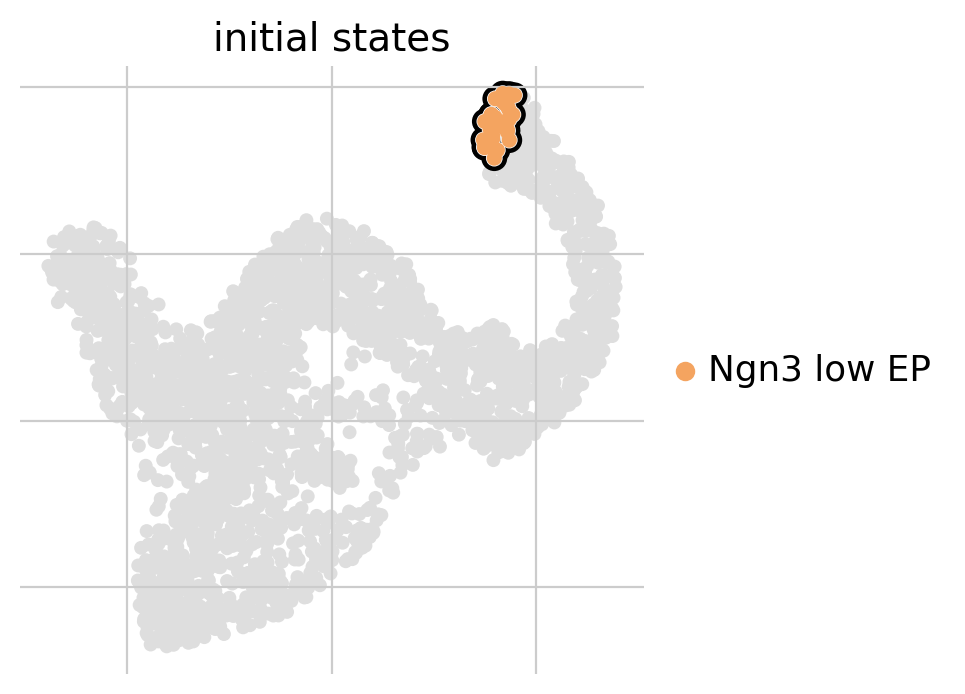

In [7]:
g.predict_initial_states()
g.plot_macrostates(which="initial", legend_loc="right", s=100)

In [8]:
g

GPCCA[kernel=VelocityKernel[n=2531], initial_states=['Ngn3 low EP'], terminal_states=None]

In [ ]:
np.nan_to_num

In [13]:
root_cell_index = g.initial_states_probabilities.idxmax()
root_cell_index

#print(f"Root cell: {root_cell}")

'GGAATAAGTAGCTAAA-1-3'

In [14]:
adata[root_cell_index].

,day,proliferation,G2M_score,S_score,phase,clusters_coarse,clusters,clusters_fine,louvain_Alpha,louvain_Beta,palantir_pseudotime,initial_size_unspliced,initial_size_spliced,initial_size,n_counts,macrostates_fwd,init_states_fwd,init_states_fwd_probs
index,,,,,,,,,,,,,,,,,,
GGAATAAGTAGCTAAA-1-3,15.5,Non-Cycling,-0.15973,-0.135054,G1,Ngn3 low EP,Ngn3 low EP,Ngn3 low EP,NaN,NaN,0.001702,917.0,6866.0,6866.0,4644.394531,Ngn3 low EP,Ngn3 low EP,1.0


In [11]:
root_cell = adata.obs_names[g.initial_states.idxmax()]
print(f"Root cell: {root_cell}")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices